In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import tqdm
import datetime
import os
from matplotlib import gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

In [2]:
def runningmean(means,T):
    r=[]
    for i in range(T):
        r.append(np.nanmean(means[0:i+T+1]))

    for i in range(T,np.size(means)-T):
        r.append(np.nanmean(means[i-T:i+T+1]))

    for i in range(np.size(means)-T,np.size(means)+1):
        r.append(np.nanmean(means[i-T:]))

    return r

In [3]:
# import snow depth and all freeboard data from 01/01/2010 - 31/12/2020
CS2_CPOM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2_CPOM_full.nc')['Radar Freeboard'])
CS2_LARM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2_LARM_full.nc')['Radar Freeboard'])
CS2S3_CPOM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2S3_CPOM_full.nc')['Radar Freeboard'])
CS2S3_LARM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2S3_LARM_full.nc')['Radar Freeboard'])
AK_LARM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/AK_LARM_full.nc')['Radar Freeboard'])
AK_CPOM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/AK_CPOM_full.nc')['Radar Freeboard'])
IS2 = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/IS2_full.nc')['Laser Freeboard'])
SNOW = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/data/SMLG_snod_EASE.nc')['Snow Depth'])

In [4]:
seasons = ['2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17',
           '2017-18','2018-19','2019-20']

# 1/10 - 1/4 for every season
days = [np.arange(273,456), # 2010-2011
        np.arange(638,822), # 2011-2012
        np.arange(1004,1187), # 2012-2013
        np.arange(1369,1552), # 2013-2014
        np.arange(1734,1917), # 2014-2015
        np.arange(2099,2283), # 2015-2016
        np.arange(2465,2648), # 2016-2017
        np.arange(2830,3013), # 2017-2018
        np.arange(3195,3378), # 2018-2019
        np.arange(3560,3744) # 2019-2020
       ]        

cs2_cpom = {} ; cs2_larm = {} ; snow = {} ; ak_cpom = {} ; is2 = {} ; cs2s3_cpom = {} ; cs2s3_larm = {} ; ak_larm = {}
means = [cs2_cpom,cs2_larm, snow, ak_cpom, is2, cs2s3_cpom, cs2s3_larm, ak_larm]
datasets = [CS2_CPOM, CS2_LARM, SNOW, AK_CPOM, IS2, CS2S3_CPOM, CS2S3_LARM, AK_LARM]

for season, day in zip(seasons,days):
    for data, mean in zip(datasets, means):
        dm = []
        for d in day:
            dm.append(np.nanmean(data[d]))
        mean[season] = dm

### plot seasonal daily means

<Figure size 432x288 with 0 Axes>

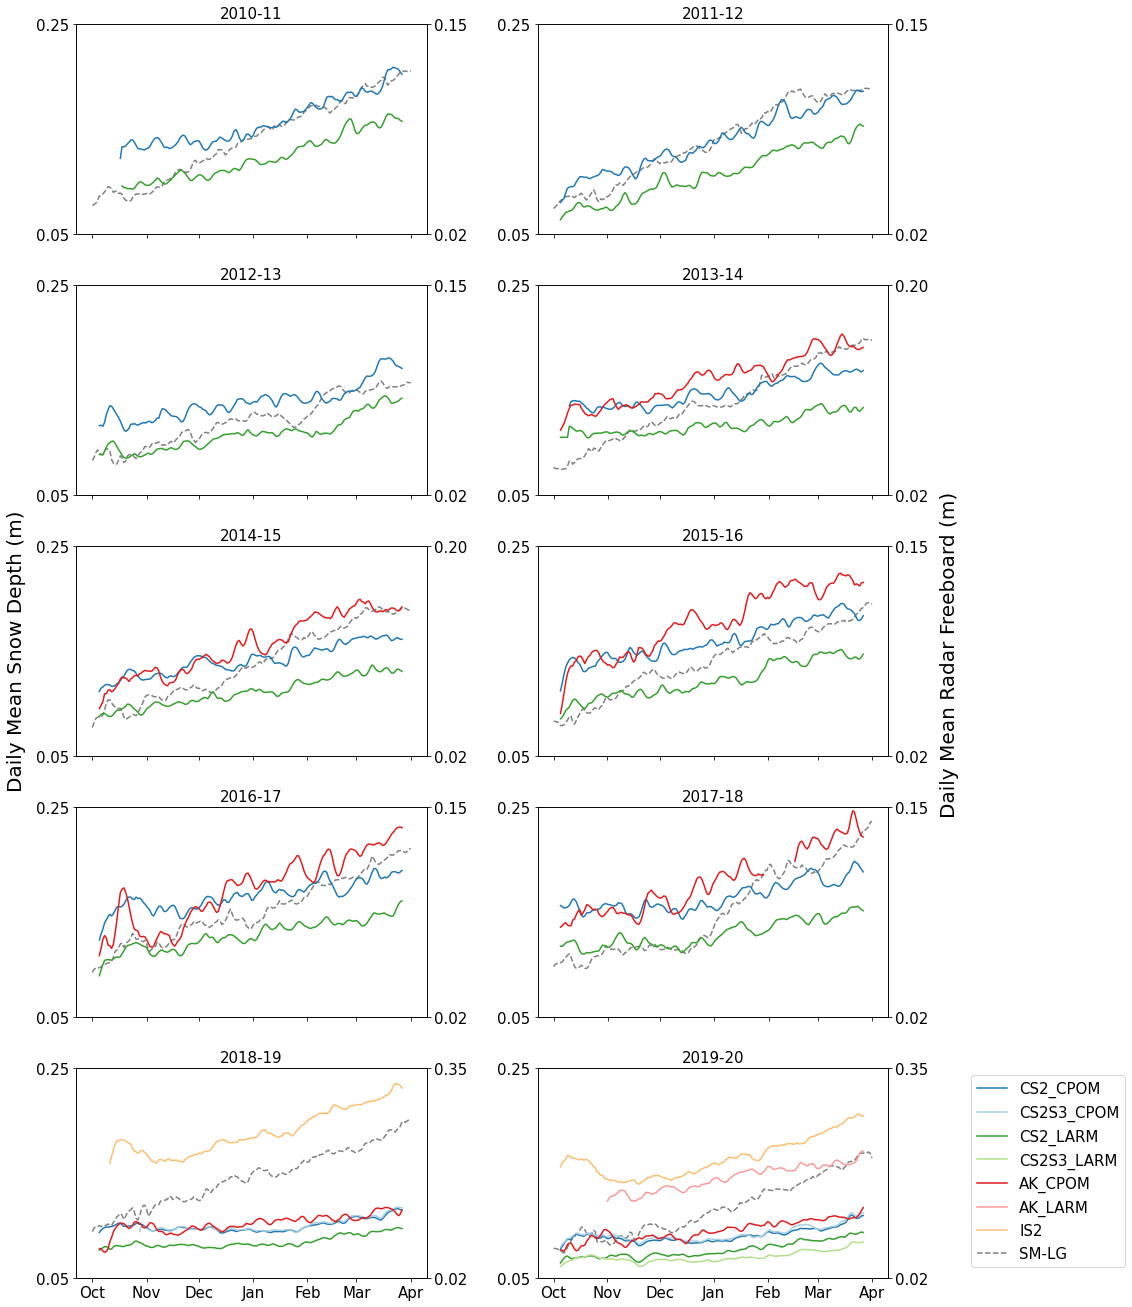

In [26]:
plt.figure()
fig, axs = plt.subplots(5,2,figsize=(12,18))
fig.tight_layout(w_pad=8,h_pad=3)

for counter, ax in enumerate(axs.reshape(-1)):
        season = seasons[counter]
        ax.plot(days[counter],snow[season],color='grey',linestyle='dashed')
        ax.set_ylim([0.05, 0.25])
        ax.yaxis.set_major_locator(ticker.LinearLocator(2))
        ax.tick_params(labelsize=15)
        ax1b = ax.twinx()
        ax1b.plot(days[counter],cs2_cpom[season],label='CS2_CPOM',color='#1f78b4')
        ax1b.plot(days[counter],cs2s3_cpom[season],label='CS2S3_CPOM',color='#a6cee3')
        ax1b.plot(days[counter],cs2_larm[season],label='CS2_LARM',color='#33a02c')
        ax1b.plot(days[counter],cs2s3_larm[season],label='CS2S3_LARM',color='#b2df8a')
        ax1b.plot(days[counter],ak_cpom[season],label='AK_CPOM',color='#e31a1c')
        ax1b.plot(days[counter],ak_larm[season],label='AK_LARM',color='#fb9a99')
        ax1b.plot(days[counter],is2[season],label='IS2',color='#fdbf6f')
        ax1b.tick_params(labelsize=15)
        
        if counter in [0,1,2,5,6,7]:
            ax1b.set_ylim([0.02, 0.15])
        elif counter in [3,4]:
            ax1b.set_ylim([0.02, 0.2])
        else:
            ax1b.set_ylim([0.02, 0.35])
        ax1b.plot([days[counter][40]],[0],color='grey',label='SM-LG', linestyle='dashed')

        ax1b.set_title(seasons[counter],fontsize=15)
        ax1b.yaxis.set_major_locator(ticker.LinearLocator(2))
        if counter in [1,5,9]:
            ax.set_xticks([days[counter][0], days[counter][31], days[counter][61], days[counter][92],days[counter][123], days[counter][152], days[counter][183]])
        else:
            ax.set_xticks([days[counter][0], days[counter][31], days[counter][61], days[counter][92],days[counter][123], days[counter][151], days[counter][182]])
        if counter >7:
            ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'])
        else:    
            ax.set_xticklabels([])
ax1b.legend(bbox_to_anchor = (1.7, 1),fontsize=15)

fig.text(1.05, 0.38, 'Daily Mean Radar Freeboard (m)', ha='center', rotation='vertical',fontsize=20)
fig.text(-0.03, 0.4, 'Daily Mean Snow Depth (m)', ha='center', rotation='vertical',fontsize=20)
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/supp_figs/retrack_daily_means.png',bbox_inches = "tight")

### plot regional daily means 2019-20

In [27]:
mask_values = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/NSIDC_Regions_Mask.npy')
regions = ['Baffin','Greenland','Barents','Kara','Laptev','E. Siberian','Chukchi','Beaufort','Central Arctic']
regs = [6,7,8,9,10,11,12,13,15]

cs2cpom_means = {} ; cs2larm_means = {} ; cs2s3cpom_means = {} ; cs2s3larm_means = {} ; snow_means = {} ;
akcpom_means = {} ; aklarm_means = {} ; is2_means = {} 

means = [cs2cpom_means,cs2larm_means,snow_means,akcpom_means,is2_means,cs2s3cpom_means,cs2s3larm_means,aklarm_means]

for region, reg in zip(regions, regs):
    
    for data, mean in zip(datasets, means):
        data_c = data[3560:3745].copy()
        
        regional_means = np.full(len(data_c),np.nan)

        for day in np.arange(0,len(regional_means)):
            data_c[day][~np.isin(mask_values, reg)] = np.nan
            regional_means[day] = np.nanmean(data_c[day])

        mean[region] = regional_means

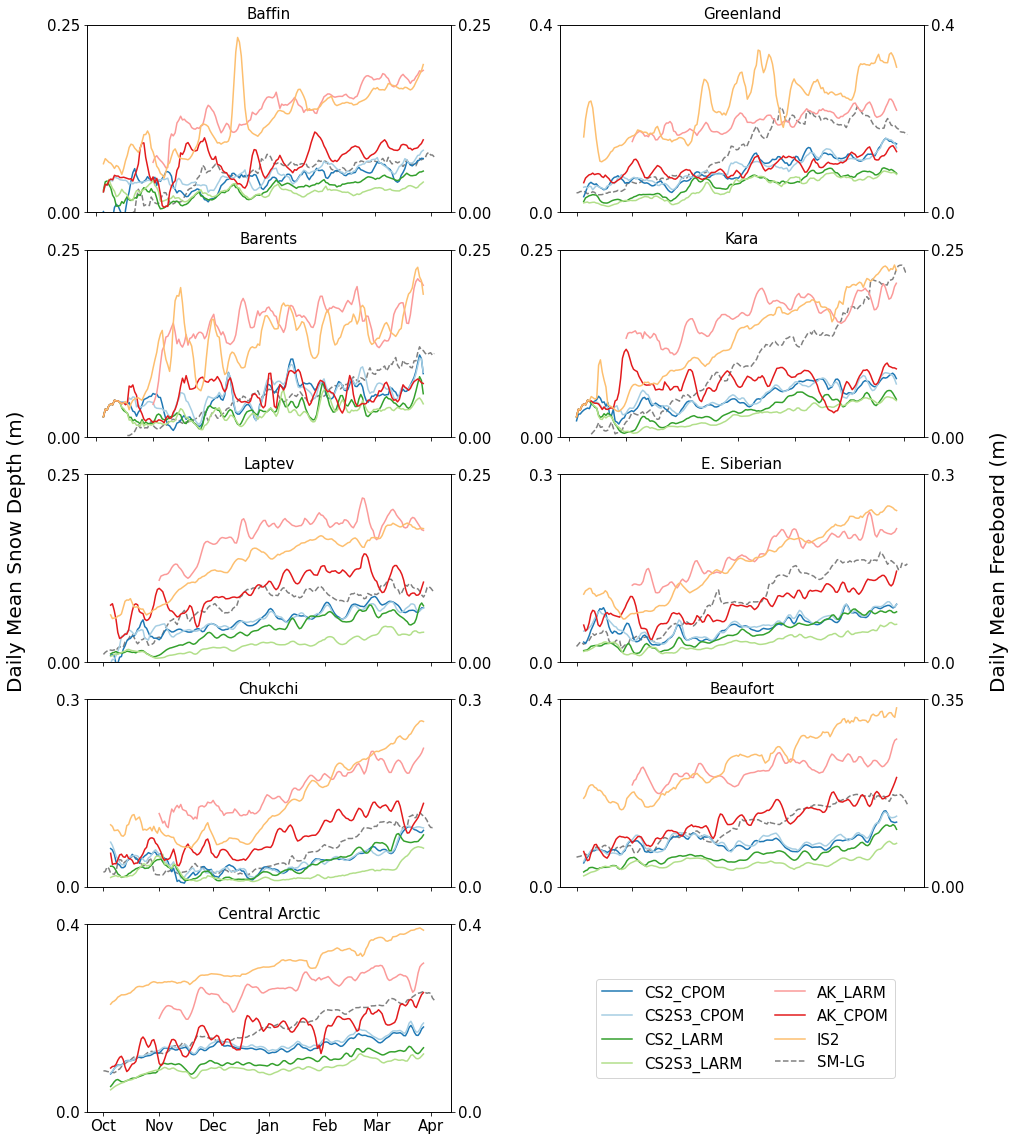

In [29]:
days = np.arange(0,len(regional_means))

fig = plt.figure(figsize=(15,20))
spec = gridspec.GridSpec(ncols=2, nrows=5, wspace=0.3, hspace=0.2)
        
for counter in np.arange(0,9):
    ax1 = fig.add_subplot(spec[counter])
    ax1.plot(days,snow_means[regions[counter]],color='grey',linestyle='dashed')
    if counter in [5,6]:
        ax1.set_ylim([0,0.3])
    if counter in [0,2,3,4]:
        ax1.set_ylim([0,0.25])
    elif counter in [1,8,7]:
        ax1.set_ylim([0,0.4])
    ax1.yaxis.set_major_locator(ticker.LinearLocator(2))
    ax1.tick_params(labelsize=15)

    ax2 = ax1.twinx()
    ax2.plot(days,cs2cpom_means[regions[counter]],label='CS2_CPOM',color='#1f78b4')
    ax2.plot(days,cs2s3cpom_means[regions[counter]],label='CS2S3_CPOM',color='#a6cee3')
    ax2.plot(days,cs2larm_means[regions[counter]],label='CS2_LARM',color='#33a02c')
    ax2.plot(days,cs2s3larm_means[regions[counter]],label='CS2S3_LARM',color='#b2df8a')
    ax2.plot(days,aklarm_means[regions[counter]],label='AK_LARM',color='#fb9a99')
    ax2.plot(days,akcpom_means[regions[counter]],label='AK_CPOM',color='#e31a1c')
    ax2.plot(days,is2_means[regions[counter]],label='IS2',color='#fdbf6f')
    ax2.plot([days[40]],[0],color='grey',label='SM-LG',linestyle='dashed')

    if counter in [1,8]:
        ax2.set_ylim([0,0.4])
    if counter in [0,2,3,4]:
        ax2.set_ylim([0,0.25])
    elif counter in [5,6]:
        ax2.set_ylim([0,0.3])
    elif counter == 7:
        ax2.set_ylim([0,0.35])
    ax2.yaxis.set_major_locator(ticker.LinearLocator(2))
    ax2.set_title(regions[counter],fontsize=15)
    ax2.set_xticks([0,31,61,92,123,152,182])
    ax2.tick_params(labelsize=15)

    if counter < 8:
        ax1.set_xticklabels([])
    else:
        ax1.set_xticklabels(['Oct','Nov','Dec','Jan','Feb','Mar','Apr'])
        
ax2.legend(bbox_to_anchor = (2.24, 0.75),fontsize=15,ncol=2)

fig.text(0.97, 0.42, 'Daily Mean Freeboard (m)', ha='center', rotation='vertical',fontsize=20)
fig.text(0.06, 0.42, 'Daily Mean Snow Depth (m)', ha='center', rotation='vertical',fontsize=20)
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/supp_figs/regional_daily_means.png',bbox_inches = "tight")